In [27]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import linear_model, metrics, model_selection

# Load the Data

In [28]:
file_name = 'stock.csv'
data = pd.read_csv(file_name,encoding = "ISO-8859-1")

In [29]:
data.head()

,Date,Open Price,Close Price,High Price,Low Price,Volume
0,2-Jan-09,902.99,931.80,934.73,899.35,4048270080
1,5-Jan-09,929.17,927.45,936.63,919.53,5413910016
2,6-Jan-09,931.17,934.70,943.85,927.28,5392620032
3,7-Jan-09,927.45,906.65,927.45,902.37,4704940032
4,8-Jan-09,905.73,909.73,910.00,896.81,4991549952


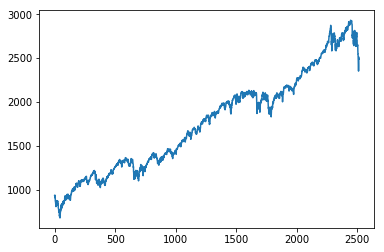

In [30]:
close_price = data['Close Price']
close_price.plot()

# Prepare the Data

,Date,Open Price,Close Price,High Price,Low Price,Volume,log_change
0,2-Jan-09,902.99,931.80,934.73,899.35,4048270080,NaN
1,5-Jan-09,929.17,927.45,936.63,919.53,5413910016,-0.004679
2,6-Jan-09,931.17,934.70,943.85,927.28,5392620032,0.007787
3,7-Jan-09,927.45,906.65,927.45,902.37,4704940032,-0.030469
4,8-Jan-09,905.73,909.73,910.00,896.81,4991549952,0.003391


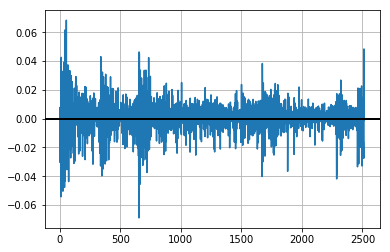

In [31]:
close = data['Close Price']
data['log_change'] = np.log(close) - np.log(close.shift(1))
data.log_change.plot(grid=True).axhline(y=0, color='black', lw=2)
data.head()

In [32]:
def mapping(x):
    if x>0:
        return 1
    else:
        return 0
data['price_change']=data['log_change'].apply(mapping)
data.head()

,Date,Open Price,Close Price,High Price,Low Price,Volume,log_change,price_change
0,2-Jan-09,902.99,931.80,934.73,899.35,4048270080,NaN,0
1,5-Jan-09,929.17,927.45,936.63,919.53,5413910016,-0.004679,0
2,6-Jan-09,931.17,934.70,943.85,927.28,5392620032,0.007787,1
3,7-Jan-09,927.45,906.65,927.45,902.37,4704940032,-0.030469,0
4,8-Jan-09,905.73,909.73,910.00,896.81,4991549952,0.003391,1


轉換成datetime

In [33]:
data['Date']=pd.to_datetime(data['Date'])
print(data.dtypes)

Date            datetime64[ns]
Open Price             float64
Close Price            float64
High Price             float64
Low Price              float64
Volume                   int64
log_change             float64
price_change             int64
dtype: object


將index轉為時間

In [34]:
data=data.set_index(data['Date'],drop=True)
del data['Date']
data.head()

,Open Price,Close Price,High Price,Low Price,Volume,log_change,price_change
Date,,,,,,,
2009-01-02,902.99,931.80,934.73,899.35,4048270080,NaN,0
2009-01-05,929.17,927.45,936.63,919.53,5413910016,-0.004679,0
2009-01-06,931.17,934.70,943.85,927.28,5392620032,0.007787,1
2009-01-07,927.45,906.65,927.45,902.37,4704940032,-0.030469,0
2009-01-08,905.73,909.73,910.00,896.81,4991549952,0.003391,1


In [35]:
data.index=pd.to_datetime(data.index,format='%Y-%m-%d')#將index轉為時間datetime
data.head()

,Open Price,Close Price,High Price,Low Price,Volume,log_change,price_change
Date,,,,,,,
2009-01-02,902.99,931.80,934.73,899.35,4048270080,NaN,0
2009-01-05,929.17,927.45,936.63,919.53,5413910016,-0.004679,0
2009-01-06,931.17,934.70,943.85,927.28,5392620032,0.007787,1
2009-01-07,927.45,906.65,927.45,902.37,4704940032,-0.030469,0
2009-01-08,905.73,909.73,910.00,896.81,4991549952,0.003391,1


create two new variables, train and test including the correct data points. 

In [36]:
train = data[data.index.year<=2017].drop(columns=['log_change'])
test = data[data.index.year>2017].drop(columns=['log_change'])

In [37]:
x_train = train.loc[:,train.columns !='price_change']
y_train = train['price_change']
x_test = test.loc[:,test.columns !='price_change']
y_test = test['price_change']

# Data Visualization

In [38]:
def plot_feature(data, feature_name):
    plt.figure(figsize=(20, 3))
    plt.scatter(data[feature_name], data['price_change'])
    plt.xlabel(feature_name)
    plt.ylabel('price_change')
    plt.show()

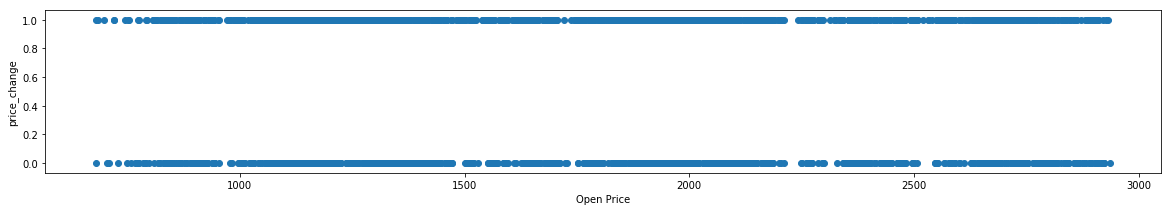

In [39]:
plot_feature(data,'Open Price')

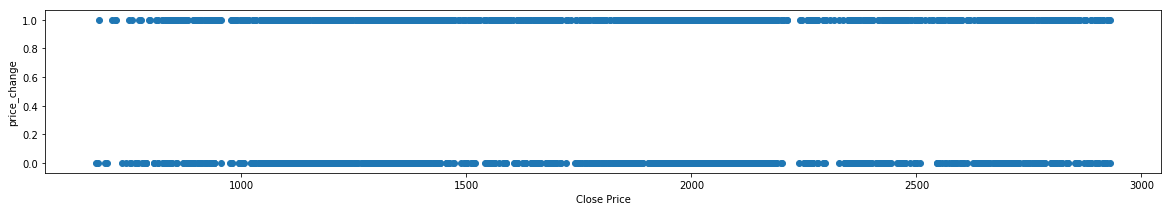

In [40]:
plot_feature(data,'Close Price')

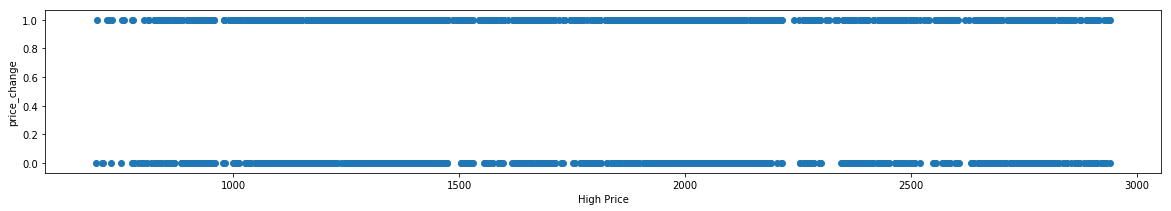

In [41]:
plot_feature(data,'High Price')

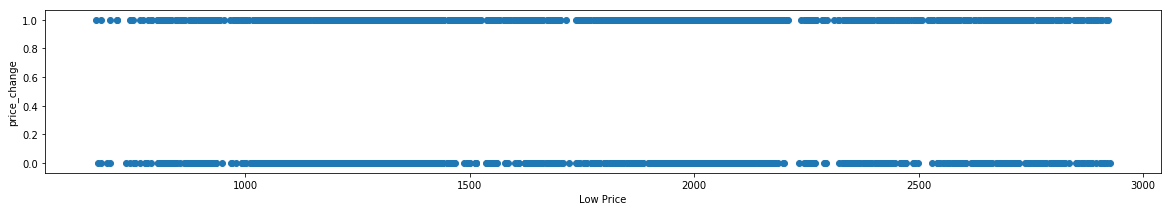

In [42]:
plot_feature(data,'Low Price')

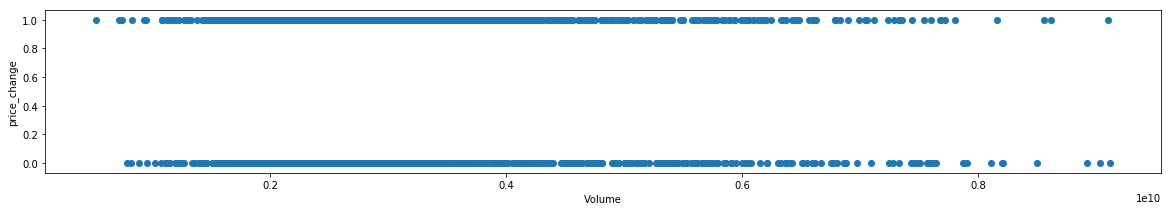

In [43]:
plot_feature(data,'Volume')

# evaluation

In [44]:
def evaluate(model, x_train, y_train, x_test, y_test):
    train_preds = model.predict(x_train)
    test_preds = model.predict(x_test)
    train_acc = metrics.accuracy_score(y_train, train_preds)
    test_acc = metrics.accuracy_score(y_test, test_preds)
    print('Train accuracy: %s' % train_acc)
    print('Test accuracy: %s' % test_acc)

# fit the data

In [45]:
def fit_evaluation(model,data):
    model.fit(x_train,y_train)
    evaluate(model, x_train, y_train, x_test, y_test)

## Gradient Descent Mode

In [46]:
model_bl = linear_model.SGDClassifier(loss='log')
fit_evaluation(model_bl, data)

Train accuracy: 0.4540636042402827
Test accuracy: 0.47619047619047616


C:\Users\asus\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


## Logistic Regression Model

### Import  package for Logistic Regression

In [47]:
from sklearn.linear_model import LogisticRegression

In [48]:
clf = LogisticRegression().fit(x_train, y_train)
fit_evaluation(clf, data)

Train accuracy: 0.5459363957597173
Test accuracy: 0.5238095238095238


C:\Users\asus\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\asus\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


## drop 'Volume'

In [49]:
x_train.head()

,Open Price,Close Price,High Price,Low Price,Volume
Date,,,,,
2009-01-02,902.99,931.80,934.73,899.35,4048270080
2009-01-05,929.17,927.45,936.63,919.53,5413910016
2009-01-06,931.17,934.70,943.85,927.28,5392620032
2009-01-07,927.45,906.65,927.45,902.37,4704940032
2009-01-08,905.73,909.73,910.00,896.81,4991549952


In [50]:
x_train = x_train.drop(['Volume'], axis=1)
x_test = x_test.drop(['Volume'], axis=1)

## Gradient Descent Mode

In [53]:
model_bl = linear_model.SGDClassifier(loss='log')
fit_evaluation(model_bl, data)

Train accuracy: 0.5459363957597173
Test accuracy: 0.5238095238095238


C:\Users\asus\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


## Logistic Regression Model

In [51]:
clf = LogisticRegression().fit(x_train, y_train)
fit_evaluation(clf, data)

Train accuracy: 0.9394876325088339
Test accuracy: 0.8253968253968254


C:\Users\asus\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\asus\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
